# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%reload_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

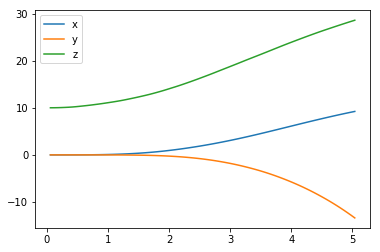

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

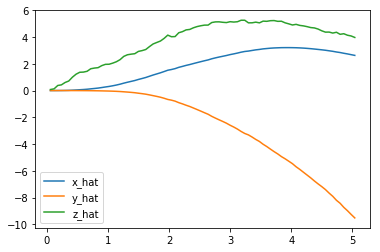

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

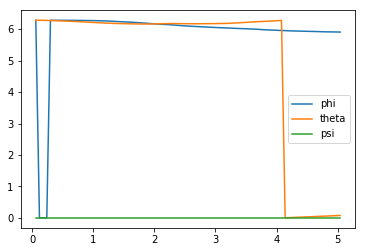

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

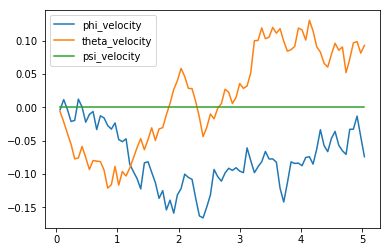

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

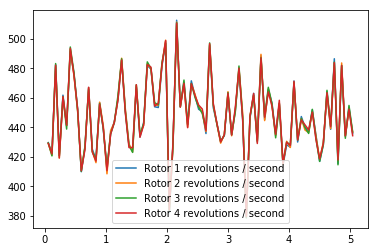

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  9.22593862 -13.38211159  28.58675803   5.90723074   0.07845078
   0.        ]
[ 2.62959674 -9.52534813  3.97064455]
[-0.07404058  0.09313542  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = -2956.474 (best = -2856.974), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [38]:
## TODO: Train your agent here.

import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from agents.actor import Actor
from agents.DDPG import DDPG

from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 200.])
init_velocities = np.array([0., 0., 80.])
task = Task(target_pos=target_pos, init_velocities=init_velocities)
agent = DDPG(task) 
best_score = -100000000
rewards = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done,curr_pos = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(score, best_score)
        if done:
            rewards.append(reward)
            print("\rEpisode=",i_episode,",score=",score,",best=", best_score,"reward=", reward, ",position=", curr_pos[:3])  # [debug]
            break
    sys.stdout.flush()

Episode= 1 ,score= 13242.520678599732 ,best= 13242.520678599732 reward= 148.24037581907865 ,position= [  6.78533024 -39.67856463  77.66749843]
Episode= 2 ,score= 18391.310462971574 ,best= 18391.310462971574 reward= 226.01430935948662 ,position= [-15.40526894 -27.614879   239.58052671]
Episode= 3 ,score= 15387.966990786457 ,best= 18391.310462971574 reward= 177.45278573619274 ,position= [  6.31378609 -30.51638342 100.26782181]
Episode= 4 ,score= 15250.87141597474 ,best= 18391.310462971574 reward= 172.97346929023809 ,position= [-16.46647631 -51.93545929 127.15317913]
Episode= 5 ,score= 9201.818135416415 ,best= 18391.310462971574 reward= 36.75668535917401 ,position= [-49.94724491 -40.89480466 300.        ]
Episode= 6 ,score= 12017.848760611425 ,best= 18391.310462971574 reward= -10.795301813286613 ,position= [-22.10219919 116.69660024 300.        ]
Episode= 7 ,score= 13528.721067870521 ,best= 18391.310462971574 reward= -14.75618398666166 ,position= [-21.49792966 121.63396609 300.        ]
E

Episode= 59 ,score= 13268.301507214695 ,best= 18725.387267158647 reward= -81.00461822490806 ,position= [ -16.01833051 -100.75266146  300.        ]
Episode= 60 ,score= 10120.473971789972 ,best= 18725.387267158647 reward= -3.2097364646991267 ,position= [ -9.98727428  10.46309904 300.        ]
Episode= 61 ,score= 13842.245937719847 ,best= 18725.387267158647 reward= -55.69777784290812 ,position= [-16.63268214 -59.1237042  300.        ]
Episode= 62 ,score= 18573.09367519051 ,best= 18725.387267158647 reward= 261.0263073866704 ,position= [-22.40774938  -6.50458996 185.28793968]
Episode= 63 ,score= 18471.993415743877 ,best= 18725.387267158647 reward= 253.0798599204563 ,position= [-22.00950141  -9.09888165 178.64296782]
Episode= 64 ,score= 18144.666964490603 ,best= 18725.387267158647 reward= 239.39910852568505 ,position= [-21.28259739 -17.16951464 170.72387581]
Episode= 65 ,score= 17809.84284608866 ,best= 18725.387267158647 reward= 228.5539952455579 ,position= [-20.70114921 -19.86409748 160.786

Episode= 116 ,score= 13414.735675124506 ,best= 18734.530981808788 reward= -116.41067455344066 ,position= [-21.75633691 121.5427281  300.        ]
Episode= 117 ,score= 15418.13096473806 ,best= 18734.530981808788 reward= -122.13965632961501 ,position= [-21.35757798 127.56112939 300.        ]
Episode= 118 ,score= 13762.184480756776 ,best= 18734.530981808788 reward= -224.5500579534366 ,position= [-22.86348961 129.01187747 300.        ]
Episode= 119 ,score= 15385.287700831663 ,best= 18734.530981808788 reward= -28.430708820867487 ,position= [-21.74272836 134.76023113 300.        ]
Episode= 120 ,score= 14843.909063790643 ,best= 18734.530981808788 reward= -123.17559492975464 ,position= [-21.69876822 128.77299471 300.        ]
Episode= 121 ,score= 13821.221516424417 ,best= 18734.530981808788 reward= -21.296154810380088 ,position= [-22.21722537 127.69856309 300.        ]
Episode= 122 ,score= 12925.693479785545 ,best= 18734.530981808788 reward= -15.446578023263143 ,position= [-22.21706196 121.530

Episode= 173 ,score= 18597.535483282696 ,best= 18734.530981808788 reward= 262.97415508754534 ,position= [-22.07724976  -5.98975619 186.67083353]
Episode= 174 ,score= 15709.512937873249 ,best= 18734.530981808788 reward= 40.82855414966185 ,position= [-18.84231084 -70.3020329  300.        ]
Episode= 175 ,score= 18575.27284084618 ,best= 18734.530981808788 reward= 261.79053049726053 ,position= [-22.14909467  -6.50071033 185.93477438]
Episode= 176 ,score= 14578.167995181751 ,best= 18734.530981808788 reward= -61.72192217781281 ,position= [-17.2754999  -66.41488305 300.        ]
Episode= 177 ,score= 18482.532787930206 ,best= 18734.530981808788 reward= 244.80800019015743 ,position= [-22.16969601 -33.02720626 208.07078823]
Episode= 178 ,score= 18675.613511181808 ,best= 18734.530981808788 reward= 266.5031170450836 ,position= [-22.56434593  -1.90777384 187.00604477]
Episode= 179 ,score= 18389.628287114116 ,best= 18734.530981808788 reward= 252.78647203185892 ,position= [-21.83725957 -12.8725046  18

Episode= 231 ,score= 16940.36931694388 ,best= 18747.2375545213 reward= -130.4451678837022 ,position= [-19.52183164 -21.3882936  300.        ]
Episode= 232 ,score= 18688.955906746643 ,best= 18747.2375545213 reward= 267.12176068982575 ,position= [-22.45387503  -1.77541029 187.45522462]
Episode= 233 ,score= 18709.97845495048 ,best= 18747.2375545213 reward= 267.28970571334025 ,position= [-22.4963961   -1.28473457 187.17440734]
Episode= 234 ,score= 18592.912900166153 ,best= 18747.2375545213 reward= 261.5156417155725 ,position= [-22.42670904  -5.89255308 185.2734919 ]
Episode= 235 ,score= 18476.865225579684 ,best= 18747.2375545213 reward= 255.88438996969623 ,position= [-22.03032452 -25.04567977 196.95678426]
Episode= 236 ,score= 18557.682977233173 ,best= 18747.2375545213 reward= 350.95189655625427 ,position= [-22.20798842 -28.47923501 199.98927945]
Episode= 237 ,score= 18454.474943631587 ,best= 18747.2375545213 reward= 226.64589795645423 ,position= [-22.10054735 -19.66006192 241.36339398]
Ep

Episode= 289 ,score= 18471.338928223086 ,best= 18758.445615688684 reward= 213.93575594787734 ,position= [-21.3686583  -12.53331465 263.21128971]
Episode= 290 ,score= 17731.61108368397 ,best= 18758.445615688684 reward= 227.07497384546917 ,position= [-20.80222386 -18.67291141 158.07757271]
Episode= 291 ,score= 18430.89106046482 ,best= 18758.445615688684 reward= 228.17705367424873 ,position= [-21.96427922 -27.51829951 231.96413205]
Episode= 292 ,score= 18734.540051932894 ,best= 18758.445615688684 reward= 270.2071201550603 ,position= [-22.11409743  -9.38202029 197.41960485]
Episode= 293 ,score= 18669.511250525953 ,best= 18758.445615688684 reward= 266.71386847779905 ,position= [-22.69840964  -1.53956982 187.01192548]
Episode= 294 ,score= 18697.934902809495 ,best= 18758.445615688684 reward= 253.02779925527835 ,position= [-22.05228349 -13.08872017 218.17333723]
Episode= 295 ,score= 18694.981944967076 ,best= 18758.445615688684 reward= 266.6638576554077 ,position= [-22.46266665  -3.37467712 188

Episode= 346 ,score= 18710.47513729228 ,best= 18775.200577187243 reward= 267.9937649903953 ,position= [-22.52365424  -0.80188082 187.53051719]
Episode= 347 ,score= 18159.262052961654 ,best= 18775.200577187243 reward= 241.86587366169294 ,position= [-21.43901108 -18.81410781 175.28405763]
Episode= 348 ,score= 11494.62604338057 ,best= 18775.200577187243 reward= -14.965824741538107 ,position= [-13.232124   -10.39044592 300.        ]
Episode= 349 ,score= 16569.49944354121 ,best= 18775.200577187243 reward= -111.04250292890417 ,position= [-19.36397561   3.99589488 300.        ]
Episode= 350 ,score= 12234.207208986143 ,best= 18775.200577187243 reward= -105.2315348554441 ,position= [ -14.39927783 -134.95044489  300.        ]
Episode= 351 ,score= 18437.9022034259 ,best= 18775.200577187243 reward= 254.47921173700286 ,position= [-22.030697   -22.23312617 193.08618076]
Episode= 352 ,score= 18621.32908611162 ,best= 18775.200577187243 reward= 263.3555509939488 ,position= [-22.45729659  -9.72982582 19

Episode= 403 ,score= 18462.70801424004 ,best= 18775.200577187243 reward= 270.16454405912134 ,position= [-22.09527742 -29.95526248 200.07729427]
Episode= 404 ,score= 18677.66765114761 ,best= 18775.200577187243 reward= 265.0160611579613 ,position= [-22.45924745  -2.62693553 185.93093096]
Episode= 405 ,score= 18458.927983158508 ,best= 18775.200577187243 reward= 253.18068736115254 ,position= [-22.21210556  -9.28065867 179.1313347 ]
Episode= 406 ,score= 18618.731969313605 ,best= 18775.200577187243 reward= 261.26299125720584 ,position= [-22.00930764  -6.63261022 185.29562069]
Episode= 407 ,score= 18626.649056488583 ,best= 18775.200577187243 reward= 264.33419255133344 ,position= [-22.43814936  -6.99624424 189.49611034]
Episode= 408 ,score= 18728.962694710477 ,best= 18775.200577187243 reward= 268.809656218076 ,position= [-22.34230756   0.30656182 187.7655867 ]
Episode= 409 ,score= 18650.142860613036 ,best= 18775.200577187243 reward= 264.4485525128707 ,position= [-22.43773438  -4.21703073 186.8

Episode= 460 ,score= 14958.070077485221 ,best= 18775.200577187243 reward= -23.017753602489584 ,position= [-17.75374925 -19.10960757 300.        ]
Episode= 461 ,score= 18704.152325278257 ,best= 18775.200577187243 reward= 268.25224776555564 ,position= [-2.25609759e+01  1.60365198e-01  1.87230484e+02]
Episode= 462 ,score= 18612.009613050395 ,best= 18775.200577187243 reward= 260.67127383242 ,position= [-22.40977102  -5.2119103  183.60444613]
Episode= 463 ,score= 18497.154864200107 ,best= 18775.200577187243 reward= 254.06523880261446 ,position= [-22.03883423  -8.51952481 179.18283326]
Episode= 464 ,score= 18676.466329495826 ,best= 18775.200577187243 reward= 265.01469914514666 ,position= [-22.50889578  -2.65335513 186.00402412]
Episode= 465 ,score= 11735.373150290367 ,best= 18775.200577187243 reward= -24.242327246301485 ,position= [-12.81901172 -17.64985366 300.        ]
Episode= 466 ,score= 18167.473509071155 ,best= 18775.200577187243 reward= 243.50709760452813 ,position= [-21.2885072  -19.

Episode= 517 ,score= 18282.402726752673 ,best= 18775.200577187243 reward= 245.14983807347573 ,position= [-21.62489161 -12.08834435 172.43488095]
Episode= 518 ,score= 14234.138172890238 ,best= 18775.200577187243 reward= 42.08848500057691 ,position= [-16.70383504 -70.89253801 300.        ]
Episode= 519 ,score= 18341.179283664635 ,best= 18775.200577187243 reward= 247.03798131266603 ,position= [-21.60706473 -13.44402169 175.83405205]
Episode= 520 ,score= 18465.13626657312 ,best= 18775.200577187243 reward= 239.60152631430972 ,position= [-22.1877639  -37.1579756  209.80381886]
Episode= 521 ,score= 18776.733219761973 ,best= 18776.733219761973 reward= 266.0099903995555 ,position= [-22.24653983 -15.11644403 202.86437666]
Episode= 522 ,score= 18531.681831597998 ,best= 18776.733219761973 reward= 257.02372238105045 ,position= [-22.29643511  -8.28124419 182.49409928]
Episode= 523 ,score= 18691.11997283346 ,best= 18776.733219761973 reward= 268.00410798507755 ,position= [-22.57573358  -4.30863706 191

Episode= 574 ,score= 18605.068542616715 ,best= 18776.733219761973 reward= 263.0642151557093 ,position= [-22.39936198  -8.22203282 189.25970697]
Episode= 575 ,score= 18538.465969044813 ,best= 18776.733219761973 reward= 245.7752798255988 ,position= [-22.09842794 -27.42116272 212.41696003]
Episode= 576 ,score= 12387.406418588364 ,best= 18776.733219761973 reward= -134.18551163119594 ,position= [ -14.88195744 -150.          300.        ]
Episode= 577 ,score= 18595.463453301607 ,best= 18776.733219761973 reward= 261.53081903463146 ,position= [-22.11313558 -17.45134252 196.01324854]
Episode= 578 ,score= 18658.506314304756 ,best= 18776.733219761973 reward= 260.7562430468459 ,position= [-22.44577771 -16.57658698 206.27064799]
Episode= 579 ,score= 18571.323027907827 ,best= 18776.733219761973 reward= 260.8956665568104 ,position= [-22.28275303 -15.44801193 193.73275011]
Episode= 580 ,score= 18445.522309023567 ,best= 18776.733219761973 reward= 252.5486061195091 ,position= [-22.1065773  -10.88472767 

Episode= 631 ,score= 18594.725692740787 ,best= 18776.733219761973 reward= 259.69331184464284 ,position= [-22.1460872   -7.02748991 184.08044843]
Episode= 632 ,score= 18724.23282620587 ,best= 18776.733219761973 reward= 269.25842406277064 ,position= [-22.45363543  -2.8494888  190.8801443 ]
Episode= 633 ,score= 18647.180792278923 ,best= 18776.733219761973 reward= 263.2494113834662 ,position= [-22.42111001  -3.37480838 184.65930702]
Episode= 634 ,score= 18726.9306309298 ,best= 18776.733219761973 reward= 268.21691754833626 ,position= [-22.44103413  -2.39093271 189.25249785]
Episode= 635 ,score= 18740.92434485089 ,best= 18776.733219761973 reward= 269.2003960455419 ,position= [-2.24145635e+01  2.53260664e-02  1.87993234e+02]
Episode= 636 ,score= 18743.790791651525 ,best= 18776.733219761973 reward= 269.02288840651727 ,position= [-22.32320739  -0.33332478 188.00049405]
Episode= 637 ,score= 18485.30192203755 ,best= 18776.733219761973 reward= 254.03535900384884 ,position= [-22.28537175  -7.318142

Episode= 688 ,score= 18596.010183869483 ,best= 18776.733219761973 reward= 263.3759175351545 ,position= [-22.497475   -13.57847447 194.80621049]
Episode= 689 ,score= 18433.071139314372 ,best= 18776.733219761973 reward= 251.21783044534652 ,position= [-22.01183939 -10.80723309 178.26131981]
Episode= 690 ,score= 18738.148013813494 ,best= 18776.733219761973 reward= 269.0612047118805 ,position= [-2.23881499e+01  1.07591296e-01  1.87897529e+02]
Episode= 691 ,score= 11080.661161944108 ,best= 18776.733219761973 reward= 64.88459345793297 ,position= [-12.45611458 -54.04074276 300.        ]
Episode= 692 ,score= 18502.034487638408 ,best= 18776.733219761973 reward= 256.5263402099346 ,position= [-21.96269399 -24.40208613 196.93500609]
Episode= 693 ,score= 18613.736710334764 ,best= 18776.733219761973 reward= 263.0474942041908 ,position= [-22.44960877  -8.29543689 189.35018067]
Episode= 694 ,score= 18140.563586527016 ,best= 18776.733219761973 reward= 239.83043545391575 ,position= [-21.40135077 -17.8059

Episode= 745 ,score= 18482.33946023392 ,best= 18776.733219761973 reward= 253.14325371075861 ,position= [-22.04714155  -9.20941233 178.85096037]
Episode= 746 ,score= 18705.637967097624 ,best= 18776.733219761973 reward= 267.716899124302 ,position= [-22.40384787  -1.32107858 187.62248137]
Episode= 747 ,score= 18476.571411757137 ,best= 18776.733219761973 reward= 257.2533033646578 ,position= [-22.02584159  -9.97403471 184.21459309]
Episode= 748 ,score= 16112.439353053574 ,best= 18776.733219761973 reward= -159.716606821184 ,position= [-19.58651538 -57.25299881 300.        ]
Episode= 749 ,score= 18272.031147949154 ,best= 18776.733219761973 reward= 245.7013026171577 ,position= [-21.46545802 -16.17479545 176.95511471]
Episode= 750 ,score= 18579.076117312427 ,best= 18776.733219761973 reward= 259.1395630657069 ,position= [-22.34414943  -6.41390524 183.03158397]
Episode= 751 ,score= 18637.949771777035 ,best= 18776.733219761973 reward= 263.7080827704611 ,position= [-22.48358878  -4.0283869  185.907

Episode= 802 ,score= 11666.520873899673 ,best= 18776.733219761973 reward= 99.52956940189361 ,position= [-12.86750034  -3.98720579 300.        ]
Episode= 803 ,score= 15794.715611849218 ,best= 18776.733219761973 reward= -56.58006574687333 ,position= [-19.21095756 -57.39889893 300.        ]
Episode= 804 ,score= 18359.157405854436 ,best= 18776.733219761973 reward= 247.27990658942036 ,position= [-21.61540896 -12.93154302 175.59932562]
Episode= 805 ,score= 18505.786404173945 ,best= 18776.733219761973 reward= 256.61636725739 ,position= [-22.13920564 -20.45022375 193.72567197]
Episode= 806 ,score= 18574.20922328424 ,best= 18776.733219761973 reward= 261.6932683022221 ,position= [-22.4370364   -5.88010263 185.49370614]
Episode= 807 ,score= 18585.47277330755 ,best= 18776.733219761973 reward= 259.8885789785169 ,position= [-22.00786068  -7.5062043  184.63883402]
Episode= 808 ,score= 17278.681055224915 ,best= 18776.733219761973 reward= -167.75374742688112 ,position= [-21.41455081 -66.66298097 300.  

Episode= 859 ,score= 18673.226663114205 ,best= 18776.733219761973 reward= 265.660215469906 ,position= [-22.33282342  -7.06458531 190.90265741]
Episode= 860 ,score= 18664.86445054463 ,best= 18776.733219761973 reward= 265.880013595544 ,position= [-22.62583208  -4.88699064 189.2928398 ]
Episode= 861 ,score= 18712.696735853955 ,best= 18776.733219761973 reward= 268.3426851005612 ,position= [-22.5271911   -0.4134401  187.53436429]
Episode= 862 ,score= 18261.67377715446 ,best= 18776.733219761973 reward= 221.9983781124501 ,position= [-21.88551002 -55.17015569 212.06296093]
Episode= 863 ,score= 18119.06538142606 ,best= 18776.733219761973 reward= 183.6929161444523 ,position= [-21.84028702 -70.78459202 241.90666686]
Episode= 864 ,score= 18344.52428755291 ,best= 18776.733219761973 reward= 247.43187082726115 ,position= [-21.92596687 -12.03301057 175.18862758]
Episode= 865 ,score= 18556.97187138525 ,best= 18776.733219761973 reward= 260.4350934268065 ,position= [-22.02355733  -7.81598695 185.60494842

Episode= 916 ,score= 18728.629434101793 ,best= 18776.733219761973 reward= 268.01887037986853 ,position= [-22.36152087  -2.86850964 189.41645284]
Episode= 917 ,score= 18677.9584658407 ,best= 18776.733219761973 reward= 266.186240904348 ,position= [-22.24271642  -3.02808969 187.4501357 ]
Episode= 918 ,score= 18303.825484390516 ,best= 18776.733219761973 reward= 245.8606743419051 ,position= [-21.73745986 -11.90754769 173.14410325]
Episode= 919 ,score= 13724.249901332632 ,best= 18776.733219761973 reward= 59.42808661334397 ,position= [-16.01771917 -51.07184072 300.        ]
Episode= 920 ,score= 18052.670326260064 ,best= 18776.733219761973 reward= 236.07833135117323 ,position= [-21.10536891 -19.51652283 169.18848201]
Episode= 921 ,score= 18410.5895609796 ,best= 18776.733219761973 reward= 254.28168611026197 ,position= [-22.33945116 -29.81347838 198.88653475]
Episode= 922 ,score= 18480.718126569074 ,best= 18776.733219761973 reward= 253.6204588142542 ,position= [-22.10155026  -9.42364122 179.6457

Episode= 973 ,score= 18641.996638368993 ,best= 18776.733219761973 reward= 263.8072387419577 ,position= [-22.56095532  -3.7305518  185.79929343]
Episode= 974 ,score= 18662.109437424693 ,best= 18776.733219761973 reward= 263.40330731844716 ,position= [-22.12790636  -4.78547345 185.94623504]
Episode= 975 ,score= 13687.065038264056 ,best= 18776.733219761973 reward= 52.16950898185528 ,position= [-16.02897002 -57.65496194 300.        ]
Episode= 976 ,score= 16832.628294660222 ,best= 18776.733219761973 reward= 27.2064759978999 ,position= [-20.54671034 -81.18691032 300.        ]
Episode= 977 ,score= 18633.20385836092 ,best= 18776.733219761973 reward= 264.4910257688223 ,position= [-22.36824615  -6.18416239 188.79709134]
Episode= 978 ,score= 15204.459527019062 ,best= 18776.733219761973 reward= -230.2716352411981 ,position= [ -18.81354858 -150.          300.        ]
Episode= 979 ,score= 18704.53165525472 ,best= 18776.733219761973 reward= 267.20698918920004 ,position= [-22.44367696  -3.83957902 189

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

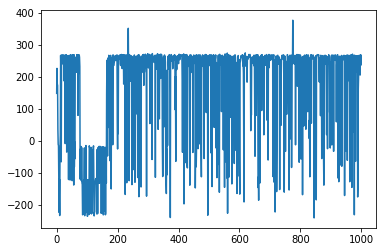

In [39]:
## TODO: Plot the rewards.
plt.plot(rewards)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
- The task specified is 'Take-off' that should move quoadcopter from (0,0,0) to (0,0,200) with intial speed toward Z-axis 80
- I used the default reward function with some tuning: 1- Add factor represents the Z-axis distance between current quadcopter Z-position and Z-destination (the less distance the more the factor value), to encourage quadcopter to take off vertically even it may shift in X and Y position, give a penalty (-10) if quadcopter crashes, and give extra-ordinary award (100000000) if quadcopter reach destination successfully

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

- I've used the suggested learning algorithm Deep Deterministic Policy Gradients (DDPG) algorithm.
- I decided to leave hyperparameters with default values as someone from knowledge section mentioned the default values are optimal values and try to focus more on reward method
- I've used the suggested neural network architecture without any modification for Actor : 1 input layer then three hidden dense layers or (fully connected) with relu activation function with nodes (32,64,32) respectively then output dense layer with sigmoid activation function then Scale [0, 1] output for each action dimension to proper range, for Critic : 1 input layer then two hidden dense layers or (fully connected)for states with relu activation function with nodes (32,64) recpectivly and other two other dense layers for action with nodes (32,64) recpectivly then combines action and state layers in hidden layer with relu activation function  then the output dense layer with one node 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- No it's not an easy task as there are a lot of parameters will affect quad-copter task such as velocity, angel velocity, ... 
- The first 100 episodes seems starts normally however episodes in (100-200) seems drop in rewards values as believed algorithm tried values that leads to quadcopter crashes so get the penality then episodes in (200-1000) it seems two aha moments which believed algorithm reaches correct (or very near) to required destination
- The agent performance results somehow acceptable. the average award for last 11 episodes are 201.7 with average position \[-21.3 -25.3 231 \] the final episode reach position \[-22.67101087 -2.37595266 187.95489984\] which is cose to destination ,as the  more work may enhanced in reward methos also, more tuning should occurs (try different reward fuction, enhance NN architecture, more tuning in parameters Gamma, Tau, ...)

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- Getting started of course and making algorithm working even after using suggested implemenation.
- the most annoying thing is (the luck factor) to tune algorithm parameters to get better results.